<a href="https://colab.research.google.com/github/pdrzxzz/Spotify-tracks/blob/main/Spotify_Tracks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das Bibliotecas

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregamento dos dados

In [ ]:
url = "https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset/resolve/main/dataset.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# Pré-processamento dos dados

## Remover colunas irrelevantes

In [ ]:
df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], inplace=True)
df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Tratar valores ausentes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   explicit          114000 non-null  bool   
 3   danceability      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   key               114000 non-null  int64  
 6   loudness          114000 non-null  float64
 7   mode              114000 non-null  int64  
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  time_signature    114000 non-null  int64  
 15  track_genre       114000 non-null  object 
dtypes: bool(1), float64(

In [ ]:
df.isna().sum().sum()

np.int64(0)

O dataset não possui valores ausentes.

## Codificar variáveis categóricas

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['track_genre'], dtype='object')

In [ ]:
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
label_encoders

{'track_genre': LabelEncoder()}

In [ ]:
df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113


# Treinamento com 10% dos dados

## Dividir o dataset

In [ ]:
X = df.drop('track_genre', axis=1)
y = df['track_genre']

# Amostragem de 10%
X_small, _, y_small, _ = train_test_split(X, y, train_size=0.10, stratify=y, random_state=42)

# Dividir em treino (70%) e restante (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X_small, y_small, train_size=0.70, stratify=y_small, random_state=42)

# Dividir o restante em validação e teste (15% cada)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(7979, 15) (7979,)
(1710, 15) (1710,)
(1711, 15) (1711,)


## Padronizar atributos numéricos (Z-score)

In [ ]:
X_train.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
49066,63,184000,False,0.292,0.947,1,-4.449,1,0.0906,0.001710,0.5930,0.191,0.0859,150.101,4
92716,24,308546,False,0.468,0.727,2,-10.084,1,0.0530,0.043300,0.0012,0.234,0.6520,134.854,4
25362,64,235666,False,0.521,0.233,7,-13.683,1,0.0254,0.635000,0.0000,0.245,0.4000,78.930,3
72892,56,290356,False,0.465,0.930,2,-2.804,0,0.0527,0.000034,0.0311,0.147,0.2630,118.998,4
78884,25,249533,False,0.665,0.877,2,-5.043,1,0.0332,0.140000,0.0000,0.855,0.6290,119.975,4


Todos as features (atributos de X) são numéricos.

In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

*Observação: Sem vazamento de informação (data leakage), a escala é aprendida apenas com os dados de treino e essa mesma escala é aplicada aos dados de validação e teste.*

In [ ]:
X_train

array([[ 1.3357392 , -0.4270882 , -0.3069411 , ..., -1.49062938,
         0.93729539,  0.21186586],
       [-0.40889209,  0.76360399, -0.3069411 , ...,  0.69033531,
         0.43053681,  0.21186586],
       [ 1.38047334,  0.06685221, -0.3069411 , ..., -0.28052337,
        -1.42818733, -2.14255993],
       ...,
       [ 0.44105649, -0.6128345 , -0.3069411 , ...,  0.50155724,
         0.59625454,  0.21186586],
       [ 0.75419544, -0.70433575, -0.3069411 , ...,  0.14326415,
        -2.05695751,  0.21186586],
       [ 1.06733439, -0.03137946, -0.3069411 , ...,  1.1603542 ,
        -0.22907694,  0.21186586]])

Os dados foram convertidos de um dataframe para um np.array.

## Implementação dos Modelos (Com GridSearchCV)

### K-Nearest Neighbors (K-NN)

In [ ]:
start_time = time.time()

param_grid_knn = {
    'n_neighbors': [1, 3, 7, 13, 21, 30],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, verbose=3)
grid_knn.fit(X_train, y_train)

end_time = time.time()
execution_time = end_time - start_time

print(f'Tempo de execução: {execution_time:.2f} segundos')

best_knn = grid_knn.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.136 total time=   0.4s
[CV 2/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.135 total time=   0.4s
[CV 3/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.126 total time=   0.3s
[CV 1/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.136 total time=   0.3s
[CV 2/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.135 total time=   0.2s
[CV 3/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.126 total time=   0.3s
[CV 1/3] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.108 total time=   0.4s
[CV 2/3] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.114 total time=   0.4s
[CV 3/3] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.109 total time=   0.4s
[CV 1/3] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.140 tot

In [ ]:
best_knn

KNeighborsClassifier(metric='manhattan', n_neighbors=30, weights='distance')

### Learning Vector Quantization (LVQ)


Implementação manual do LVQ utilizando OOP.

In [ ]:
class LVQ:
    def __init__(self, n_prototypes_per_class=1, initial_lr=0.1, n_epochs=100,
                 lr_decay=0.95, tol=1e-4, early_stopping=5, verbose=False):
        self.n_prototypes_per_class = n_prototypes_per_class
        self.initial_lr = initial_lr
        self.n_epochs = n_epochs
        self.lr_decay = lr_decay
        self.tol = tol
        self.early_stopping = early_stopping
        self.verbose = verbose
        self.scaler = StandardScaler()

    def _initialize_prototypes(self, X, y):
        """Inicializa os protótipos usando amostras representativas de cada classe"""
        self.prototypes_ = []
        self.prototype_labels_ = []

        for c in self.classes_:
            X_c = X[y == c]

            # Se apenas um protótipo por classe, usa a média
            if self.n_prototypes_per_class == 1:
                self.prototypes_.append(X_c.mean(axis=0))
                self.prototype_labels_.append(c)
            else:
                # Para múltiplos protótipos, usa k-means++ initialization
                centroids = [X_c[np.random.choice(len(X_c))]]

                for _ in range(1, self.n_prototypes_per_class):
                    dists = np.array([min([np.linalg.norm(x-c)**2 for c in centroids]) for x in X_c])
                    probs = dists / dists.sum()
                    centroid_idx = np.random.choice(len(X_c), p=probs)
                    centroids.append(X_c[centroid_idx])

                self.prototypes_.extend(centroids)
                self.prototype_labels_.extend([c] * self.n_prototypes_per_class)

        self.prototypes_ = np.array(self.prototypes_)
        self.prototype_labels_ = np.array(self.prototype_labels_)

    def fit(self, X, y):
        # Converter y para numpy array se for pandas Series
        y = np.array(y)

        # Pré-processamento
        X = self.scaler.fit_transform(X)
        self.classes_ = np.unique(y)

        # Inicialização dos protótipos
        self._initialize_prototypes(X, y)

        best_prototypes = self.prototypes_.copy()
        best_score = -np.inf
        no_improvement_count = 0

        for epoch in range(self.n_epochs):
            lr = self.initial_lr * (self.lr_decay ** epoch)
            prototype_updates = np.zeros_like(self.prototypes_)
            update_counts = np.zeros(len(self.prototypes_))

            # Embaralhar os dados usando sklearn.utils.shuffle
            X_shuffled, y_shuffled = shuffle(X, y, random_state=epoch)

            for xi, yi in zip(X_shuffled, y_shuffled):
                # Calcular distâncias euclidianas
                dists = np.linalg.norm(self.prototypes_ - xi, axis=1)
                winner_idx = np.argmin(dists)
                winner_label = self.prototype_labels_[winner_idx]

                # Atualizar o protótipo vencedor
                if winner_label == yi:
                    prototype_updates[winner_idx] += lr * (xi - self.prototypes_[winner_idx])
                else:
                    prototype_updates[winner_idx] -= lr * (xi - self.prototypes_[winner_idx])
                update_counts[winner_idx] += 1

            # Aplicar atualizações (evitar divisão por zero)
            mask = update_counts > 0
            self.prototypes_[mask] += prototype_updates[mask] / update_counts[mask][:, None]

            # Verificar convergência e early stopping
            y_pred = self._predict(X)
            current_score = accuracy_score(y, y_pred)

            if current_score > best_score + self.tol:
                best_score = current_score
                best_prototypes = self.prototypes_.copy()
                no_improvement_count = 0
            else:
                no_improvement_count += 1

            if self.verbose:
                print(f"Epoch {epoch+1}, LR: {lr:.4f}, Accuracy: {current_score:.4f}")

            if no_improvement_count >= self.early_stopping:
                if self.verbose:
                    print(f"Early stopping at epoch {epoch+1}")
                break

        # Restaurar os melhores protótipos encontrados
        self.prototypes_ = best_prototypes

    def _predict(self, X):
        dists = np.linalg.norm(self.prototypes_[np.newaxis, :, :] - X[:, np.newaxis, :], axis=2)
        winner_indices = np.argmin(dists, axis=1)
        return self.prototype_labels_[winner_indices]


    def predict(self, X):
        """Predição com normalização dos dados de entrada"""
        X = self.scaler.transform(X)
        return self._predict(X)

    def score(self, X, y):
        """Calcula a acurácia"""
        return accuracy_score(y, self.predict(X))

def grid_search_lvq(X, y, param_grid, validation_size=0.2, random_state=42):
    best_params = None
    best_score = -np.inf

    X_train_sub, X_val, y_train_sub, y_val = train_test_split(X, y, test_size=validation_size, random_state=random_state)

    for n_prototypes in param_grid.get('n_prototypes_per_class', [1]):
        for initial_lr in param_grid.get('initial_lr', [0.1]):
            for n_epochs in param_grid.get('n_epochs', [30]):
                for lr_decay in param_grid.get('lr_decay', [0.95]):
                    model = LVQ(n_prototypes_per_class=n_prototypes,
                                initial_lr=initial_lr,
                                n_epochs=n_epochs,
                                lr_decay=lr_decay,
                                early_stopping=10,
                                verbose=False)
                    model.fit(X_train_sub, y_train_sub)
                    score = model.score(X_val, y_val)

                    print(f"Testando: prototypes={n_prototypes}, lr={initial_lr}, epochs={n_epochs}, decay={lr_decay} -> Accuracy: {score:.4f}")

                    if score > best_score:
                        best_score = score
                        best_params = {
                            'n_prototypes_per_class': n_prototypes,
                            'initial_lr': initial_lr,
                            'n_epochs': n_epochs,
                            'lr_decay': lr_decay
                        }

    print(f"\nMelhores parâmetros: {best_params}")
    print(f"Melhor acurácia na validação: {best_score:.4f}")
    return best_params, best_score


In [ ]:
start_time = time.time()

param_grid_lvq = {
    'n_prototypes_per_class': [1, 2],
    'initial_lr': [10, 1, 0.1],
}

# Supondo que X_train e y_train estejam definidos
best_params_lvq, best_score = grid_search_lvq(X_train, y_train, param_grid_lvq)

end_time = time.time()
execution_time = end_time - start_time

print(f'Tempo de execução: {execution_time:.2f} segundos')

best_lvq = LVQ(**best_params_lvq, early_stopping=10, verbose=True)
best_lvq.fit(X_train, y_train)

Testando: prototypes=1, lr=10, epochs=30, decay=0.95 -> Accuracy: 0.0256
Testando: prototypes=1, lr=1, epochs=30, decay=0.95 -> Accuracy: 0.1386
Testando: prototypes=1, lr=0.1, epochs=30, decay=0.95 -> Accuracy: 0.1690
Testando: prototypes=2, lr=10, epochs=30, decay=0.95 -> Accuracy: 0.0298
Testando: prototypes=2, lr=1, epochs=30, decay=0.95 -> Accuracy: 0.0796
Testando: prototypes=2, lr=0.1, epochs=30, decay=0.95 -> Accuracy: 0.0829

Melhores parâmetros: {'n_prototypes_per_class': 1, 'initial_lr': 0.1, 'n_epochs': 30, 'lr_decay': 0.95}
Melhor acurácia na validação: 0.1690
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 30, 'p': 2, 'weights': 'distance'}
Tempo de execução: 297.63 segundos
Epoch 1, LR: 0.1000, Accuracy: 0.1678
Epoch 2, LR: 0.0950, Accuracy: 0.1699
Epoch 3, LR: 0.0902, Accuracy: 0.1714
Epoch 4, LR: 0.0857, Accuracy: 0.1734
Epoch 5, LR: 0.0815, Accuracy: 0.1737
Epoch 6, LR: 0.0774, Accuracy: 0.1741
Epoch 

In [ ]:
best_lvq

### Support Vector Machine (SVM)

In [ ]:
start_time = time.time()

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']  # apenas relevante para 'rbf'
}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=3, verbose=3, n_jobs=-1)
grid_svm.fit(X_train, y_train)

end_time = time.time()
execution_time = end_time - start_time

print(f'Tempo de execução: {execution_time:.2f} segundos')

best_svm = grid_svm.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Tempo de execução: 116.10 segundos


In [ ]:
best_svm

SVC(C=1)

## Avaliação dos Modelos

🔍 Avaliação do KNN


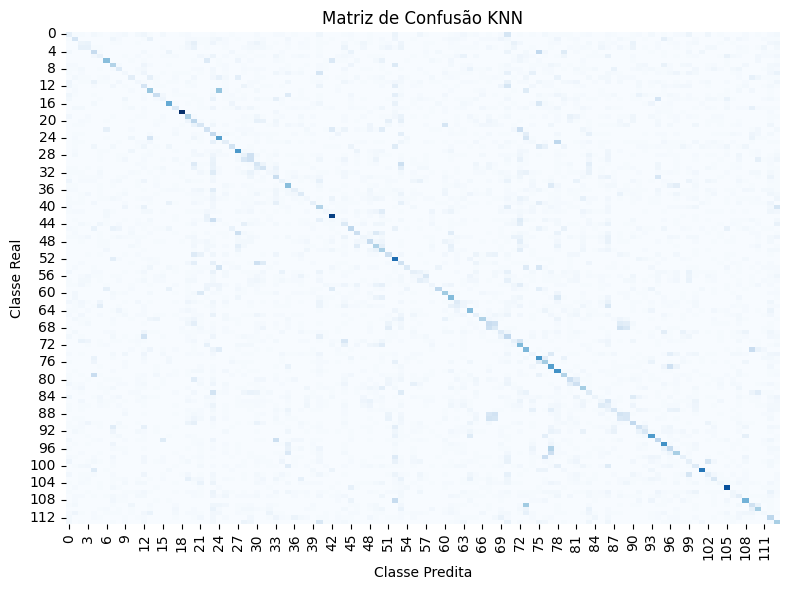

Acurácia média: 0.2030

                   precision    recall  f1-score   support

         acoustic       0.09      0.07      0.08       150
         afrobeat       0.21      0.15      0.17       150
         alt-rock       0.06      0.05      0.05       150
      alternative       0.13      0.07      0.09       150
          ambient       0.20      0.21      0.20       150
            anime       0.10      0.06      0.08       150
      black-metal       0.48      0.36      0.41       150
        bluegrass       0.23      0.26      0.25       150
            blues       0.19      0.11      0.14       150
           brazil       0.05      0.03      0.03       150
        breakbeat       0.21      0.09      0.12       150
          british       0.06      0.03      0.04       150
         cantopop       0.10      0.15      0.12       150
    chicago-house       0.31      0.33      0.32       150
         children       0.38      0.19      0.26       150
            chill       0.09   

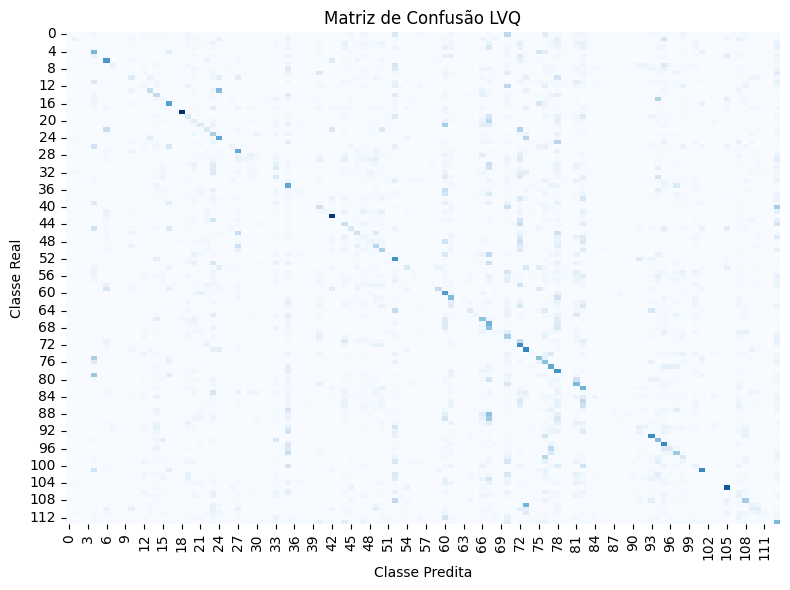

Acurácia média: 0.1609

                   precision    recall  f1-score   support

         acoustic       0.00      0.00      0.00       150
         afrobeat       0.16      0.05      0.07       150
         alt-rock       0.00      0.00      0.00       150
      alternative       0.00      0.00      0.00       150
          ambient       0.16      0.39      0.22       150
            anime       0.00      0.00      0.00       150
      black-metal       0.31      0.51      0.38       150
        bluegrass       0.25      0.07      0.11       150
            blues       0.00      0.00      0.00       150
           brazil       0.00      0.00      0.00       150
        breakbeat       0.12      0.11      0.11       150
          british       0.00      0.00      0.00       150
         cantopop       0.05      0.03      0.04       150
    chicago-house       0.30      0.21      0.25       150
         children       0.14      0.21      0.17       150
            chill       0.05   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🔍 Avaliação do SVM


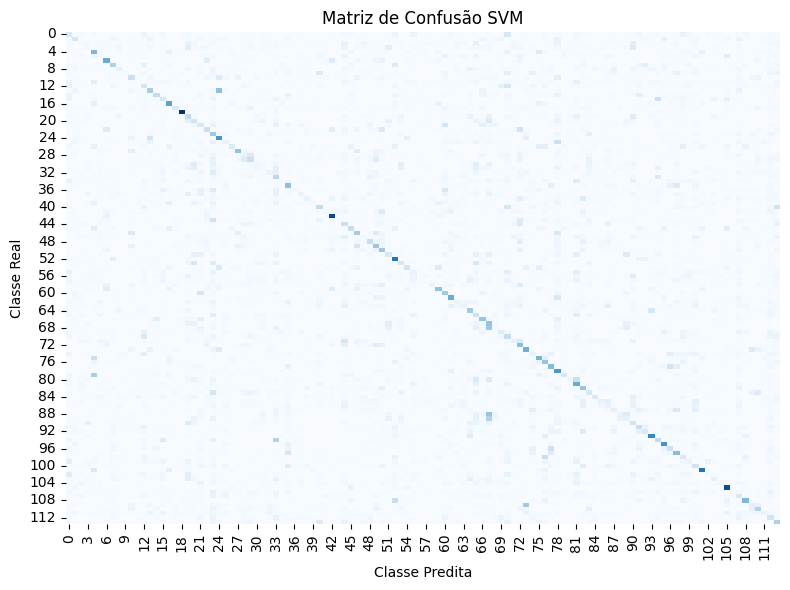

Acurácia média: 0.2015

                   precision    recall  f1-score   support

         acoustic       0.09      0.12      0.10       150
         afrobeat       0.18      0.14      0.16       150
         alt-rock       0.04      0.02      0.03       150
      alternative       0.05      0.03      0.04       150
          ambient       0.22      0.39      0.28       150
            anime       0.04      0.02      0.03       150
      black-metal       0.37      0.43      0.40       150
        bluegrass       0.31      0.28      0.29       150
            blues       0.17      0.07      0.10       150
           brazil       0.13      0.01      0.02       150
        breakbeat       0.20      0.19      0.19       150
          british       0.03      0.01      0.01       150
         cantopop       0.11      0.15      0.12       150
    chicago-house       0.29      0.30      0.29       150
         children       0.31      0.21      0.25       150
            chill       0.12   

In [ ]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)

    print(f"🔍 Avaliação do {name}")

    # y_test: valores reais do teste
    # y_pred: previsões do modelo
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', cbar=False)

    plt.title(f'Matriz de Confusão {name}')
    plt.xlabel('Classe Predita')
    plt.ylabel('Classe Real')
    plt.tight_layout()
    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia média: {accuracy:.4f}\n")

    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("-" * 60)

evaluate_model(best_knn, "KNN")
evaluate_model(best_lvq, "LVQ")
evaluate_model(best_svm, "SVM")

# Treinamento com 100% dos dados

## Dividir o dataset

In [ ]:
X = df.drop('track_genre', axis=1)
y = df['track_genre']

# Dividir em treino (70%) e restante (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.70, stratify=y, random_state=42)

# Dividir o restante em validação e teste (15% cada)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(79800, 15) (79800,)
(17100, 15) (17100,)
(17100, 15) (17100,)


## Padronizar atributos numéricos (Z-score)

In [ ]:
X_train.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
67319,0,255680,False,0.741,0.787,5,-6.228,1,0.0525,0.217,0.017900,0.0835,0.771,91.993,4
112049,0,232533,False,0.701,0.794,11,-4.679,1,0.0533,0.202,0.000000,0.4260,0.820,94.986,4
18107,26,197626,True,0.421,0.930,2,-8.505,1,0.9360,0.831,0.000000,0.6240,0.234,73.017,4
77514,44,126993,False,0.495,0.833,1,-7.145,1,0.0624,0.544,0.000000,0.3250,0.705,171.756,4
112018,52,179483,False,0.717,0.440,8,-7.563,0,0.2630,0.368,0.000009,0.1080,0.217,83.924,4


Todos as features (atributos de X) são numéricos.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

*Observação: Sem vazamento de informação (data leakage), a escala é aprendida apenas com os dados de treino e essa mesma escala é aplicada aos dados de validação e teste.*

In [ ]:
X_train

array([[-1.48885802,  0.2567404 , -0.30599033, ...,  1.14542402,
        -1.00749641,  0.22055563],
       [-1.48885802,  0.04371577, -0.30599033, ...,  1.33455679,
        -0.9074611 ,  0.22055563],
       [-0.3226639 , -0.27753757,  3.26807709, ..., -0.92731668,
        -1.64173294,  0.22055563],
       ...,
       [-0.41237114,  1.93698176,  3.26807709, ...,  0.31941563,
        -1.42712329,  0.22055563],
       [-0.59178562,  0.03825832, -0.30599033, ..., -0.43711543,
         0.97041513,  0.22055563],
       [ 0.88838384,  1.80502741, -0.30599033, ..., -0.49501322,
         0.54089502,  0.22055563]])

Os dados foram convertidos de um dataframe para um np.array.

## Implementação dos Modelos

### K-Nearest Neighbors (K-NN)

In [ ]:
start_time = time.time()

best_params_knn = best_knn.get_params()

full_knn = KNeighborsClassifier(**best_params_knn)
full_knn.fit(X_train, y_train)

end_time = time.time()
execution_time = end_time - start_time

print(f'Tempo de execução: {execution_time:.2f} segundos')

Tempo de execução: 0.19 segundos


### Learning Vector Quantization (LVQ)

In [ ]:
full_lvq = LVQ(**best_params_lvq, early_stopping=10, verbose=True)
full_lvq.fit(X_train, y_train)

Epoch 1, LR: 0.1000, Accuracy: 0.1678
Epoch 2, LR: 0.0950, Accuracy: 0.1699
Epoch 3, LR: 0.0902, Accuracy: 0.1714
Epoch 4, LR: 0.0857, Accuracy: 0.1734
Epoch 5, LR: 0.0815, Accuracy: 0.1737
Epoch 6, LR: 0.0774, Accuracy: 0.1741
Epoch 7, LR: 0.0735, Accuracy: 0.1738
Epoch 8, LR: 0.0698, Accuracy: 0.1743
Epoch 9, LR: 0.0663, Accuracy: 0.1741
Epoch 10, LR: 0.0630, Accuracy: 0.1737
Epoch 11, LR: 0.0599, Accuracy: 0.1727
Epoch 12, LR: 0.0569, Accuracy: 0.1732
Epoch 13, LR: 0.0540, Accuracy: 0.1726
Epoch 14, LR: 0.0513, Accuracy: 0.1715
Epoch 15, LR: 0.0488, Accuracy: 0.1695
Epoch 16, LR: 0.0463, Accuracy: 0.1692
Epoch 17, LR: 0.0440, Accuracy: 0.1679
Epoch 18, LR: 0.0418, Accuracy: 0.1680
Early stopping at epoch 18


### Support Vector Machine (SVM)

In [ ]:
start_time = time.time()

best_params_svm = best_svm.get_params()

full_svm = SVC(**best_params_svm)
full_svm.fit(X_train, y_train)

end_time = time.time()
execution_time = end_time - start_time

print(f'Tempo de execução: {execution_time:.2f} segundos')

Tempo de execução: 204.39 segundos


## Avaliação dos Modelos

🔍 Avaliação do KNN


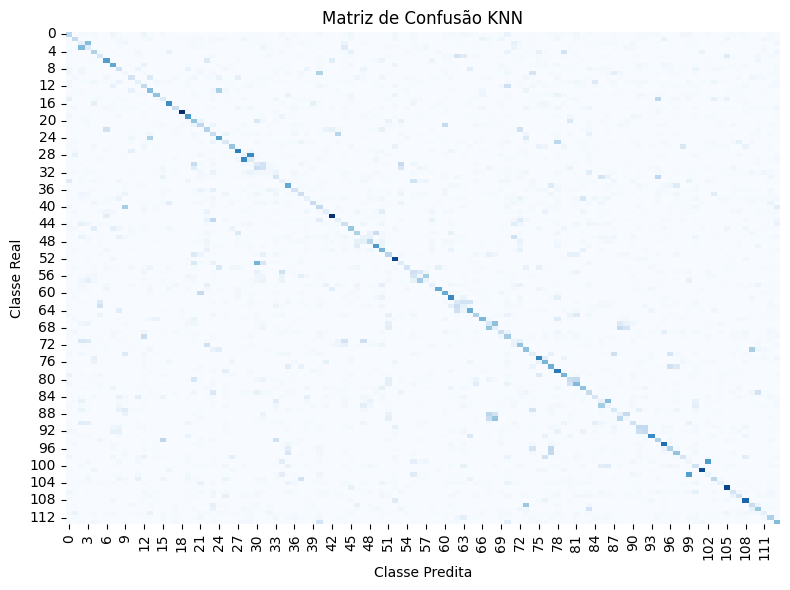

Acurácia média: 0.2585

                   precision    recall  f1-score   support

         acoustic       0.21      0.23      0.22       150
         afrobeat       0.29      0.21      0.25       150
         alt-rock       0.05      0.07      0.06       150
      alternative       0.08      0.10      0.09       150
          ambient       0.27      0.27      0.27       150
            anime       0.17      0.13      0.15       150
      black-metal       0.47      0.48      0.47       150
        bluegrass       0.37      0.44      0.40       150
            blues       0.16      0.17      0.17       150
           brazil       0.03      0.03      0.03       150
        breakbeat       0.28      0.15      0.20       150
          british       0.13      0.07      0.09       150
         cantopop       0.19      0.22      0.20       150
    chicago-house       0.31      0.36      0.33       150
         children       0.59      0.34      0.43       150
            chill       0.13   

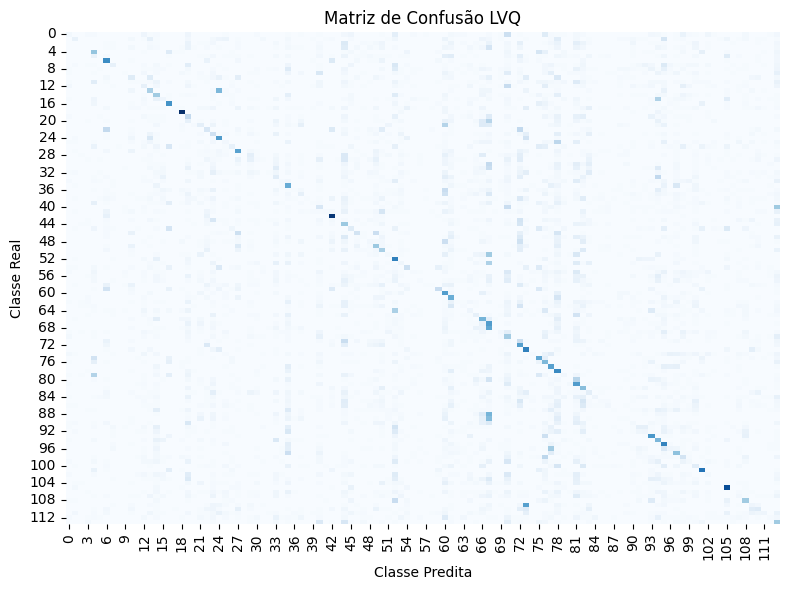

Acurácia média: 0.1705

                   precision    recall  f1-score   support

         acoustic       0.07      0.02      0.03       150
         afrobeat       0.22      0.06      0.09       150
         alt-rock       0.00      0.00      0.00       150
      alternative       0.00      0.00      0.00       150
          ambient       0.21      0.33      0.25       150
            anime       0.00      0.00      0.00       150
      black-metal       0.33      0.54      0.41       150
        bluegrass       0.28      0.07      0.11       150
            blues       0.00      0.00      0.00       150
           brazil       0.10      0.01      0.01       150
        breakbeat       0.13      0.10      0.11       150
          british       0.07      0.01      0.01       150
         cantopop       0.10      0.07      0.08       150
    chicago-house       0.24      0.28      0.26       150
         children       0.17      0.31      0.22       150
            chill       0.08   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🔍 Avaliação do SVM


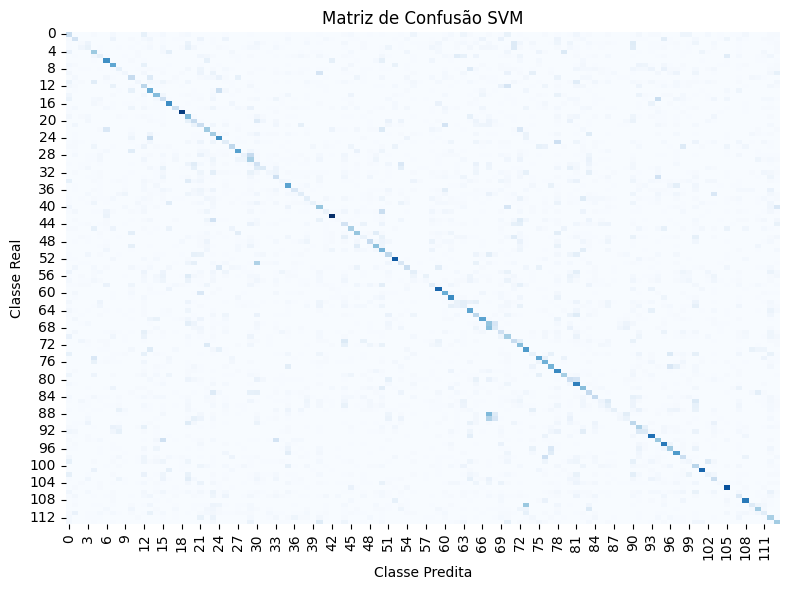

Acurácia média: 0.2763

                   precision    recall  f1-score   support

         acoustic       0.14      0.21      0.17       150
         afrobeat       0.21      0.17      0.19       150
         alt-rock       0.05      0.01      0.02       150
      alternative       0.11      0.07      0.08       150
          ambient       0.27      0.34      0.30       150
            anime       0.13      0.08      0.10       150
      black-metal       0.48      0.57      0.52       150
        bluegrass       0.42      0.48      0.45       150
            blues       0.14      0.07      0.10       150
           brazil       0.13      0.03      0.05       150
        breakbeat       0.22      0.22      0.22       150
          british       0.15      0.03      0.05       150
         cantopop       0.15      0.25      0.19       150
    chicago-house       0.29      0.46      0.36       150
         children       0.38      0.39      0.39       150
            chill       0.14   

In [ ]:
evaluate_model(full_knn, "KNN")
evaluate_model(full_lvq, "LVQ")
evaluate_model(full_svm, "SVM")